###### Importing libraries

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
x_train.shape # it's 3d array for an image

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
y_train 

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

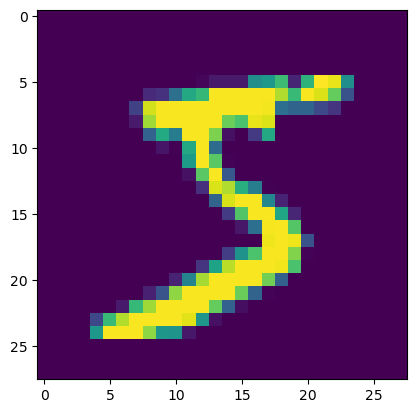

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
#5

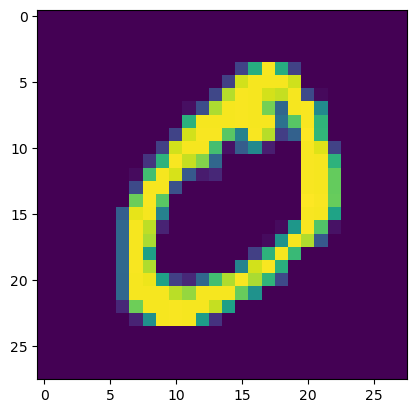

In [10]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])
#0

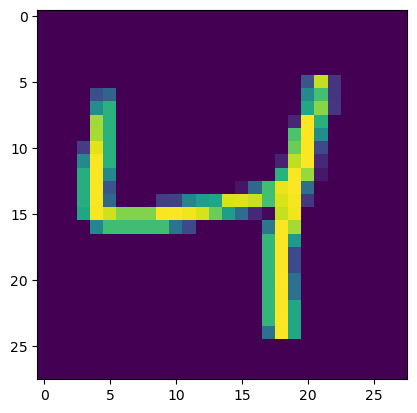

In [11]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2])
#4

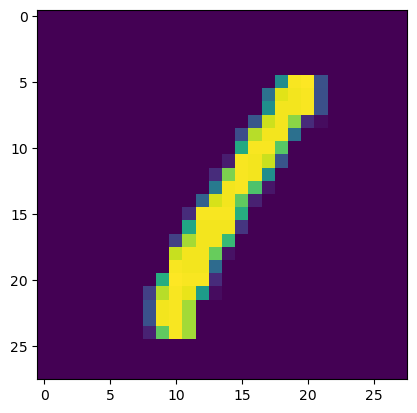

In [12]:
import matplotlib.pyplot as plt
plt.imshow(x_train[3])
#1

In [13]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [14]:
# changing pixel values from 0 to 1

In [15]:
x_train=x_train/255
x_test=x_test/255

##### Build ANN

In [36]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax')) 

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='Adam',metrics=['accuracy']) # we dont need to one hot encoding here because of sparse
                               # categorical cross entropy

In [39]:
history=model.fit(x_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2757 - accuracy: 0.9196 - val_loss: 0.1508 - val_accuracy: 0.9555
Epoch 2/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1204 - accuracy: 0.9642 - val_loss: 0.1121 - val_accuracy: 0.9647
Epoch 3/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0820 - accuracy: 0.9746 - val_loss: 0.1026 - val_accuracy: 0.9700
Epoch 4/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0608 - accuracy: 0.9811 - val_loss: 0.0905 - val_accuracy: 0.9735
Epoch 5/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0468 - accuracy: 0.9853 - val_loss: 0.0948 - val_accuracy: 0.9732
Epoch 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0390 - accuracy: 0.9875 - val_loss: 0.1073 - val_accuracy: 0.9729
Epoch 7/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0315 - accuracy: 0.9899 - val_loss: 0.0993 - val_accuracy:

###### Predictions

In [40]:
y_prob=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [41]:
y_pred=y_prob.argmax(axis=1)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.978

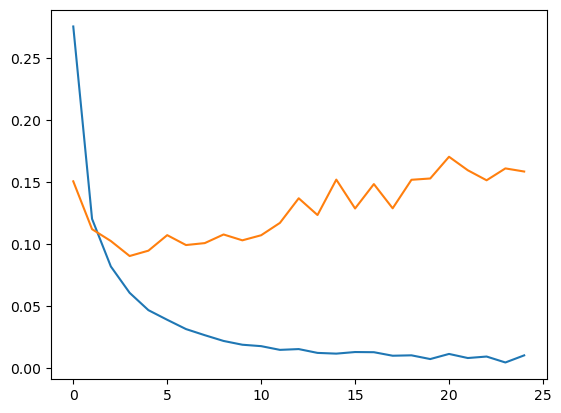

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

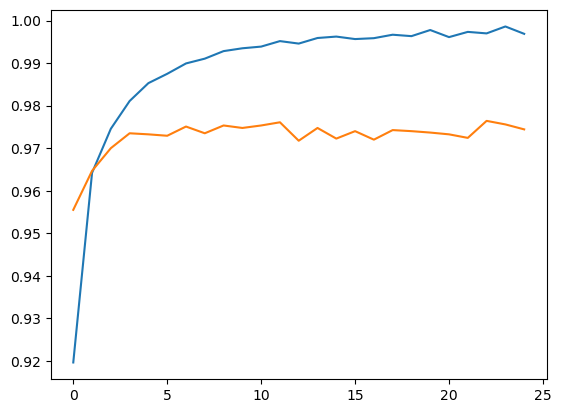

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

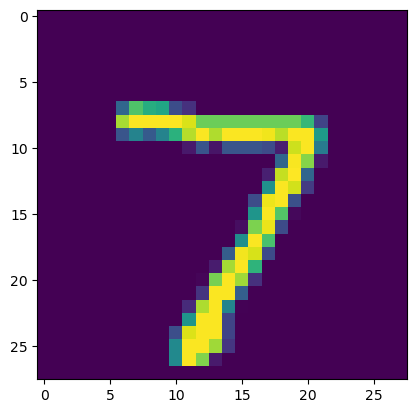

In [46]:
plt.imshow(x_test[0])

In [47]:
model.predict(x_test[0].reshape(1,28,28)).argmax()

1/1 [==============================] - 0s 25ms/step


array([[4.6179490e-27, 1.4124765e-15, 7.4632933e-18, 8.6493500e-11,
        7.9487996e-30, 1.8322996e-15, 4.1323494e-30, 1.0000000e+00,
        3.5329932e-16, 2.8883686e-15]], dtype=float32)